# Pymatceuticals Inc.

## Analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data = pd.merge(study_results, mouse_metadata, how="inner", on="Mouse ID")

# Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
#checking the number of mice
number_of_mice = data["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

dup_mice = data[data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
dup_mice




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_dups = data.loc[data['Mouse ID'] != "g989"]
number_of_mice = no_dups["Mouse ID"].nunique()
number_of_mice

248

## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_mean = no_dups.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()

regimen_median = no_dups.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()

regimen_variance = no_dups.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()

regimen_std = no_dups.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()

regimen_sem = no_dups.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Mean Tumor Volume": regimen_mean,
                             "Median Tumor Volume": regimen_median,
                             "Tumor Volume Variance": regimen_variance,
                             "Tumor Volume Std. Dev.": regimen_std,
                             "Tumor Volume Std. Err.": regimen_sem})

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [6]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
no_dups.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

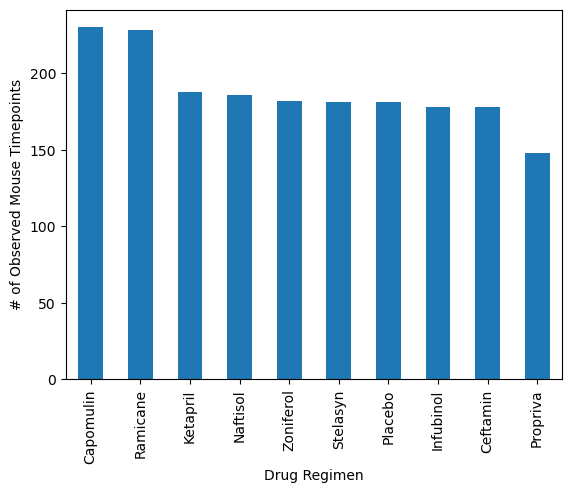

In [7]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
no_dups["Drug Regimen"].value_counts().plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")
plt.show()







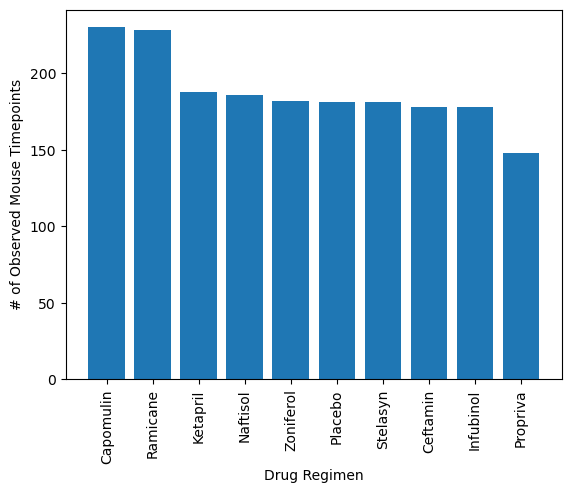

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#plt.bar(no_dups["Drug Regimen"].value_counts(), len(no_dups["Drug Regimen"]))
#plt.show()
cnt = no_dups.groupby("Drug Regimen")["Timepoint"].count()
cnt = cnt.sort_values(ascending=False)
x = cnt.index
y = cnt.values

plt.bar(x, y)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()


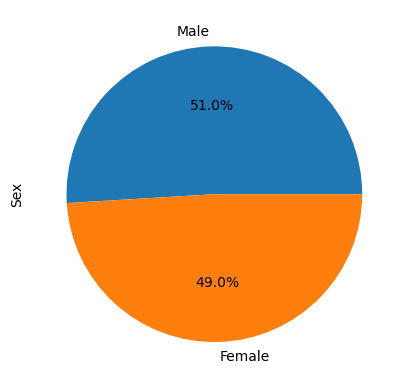

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = no_dups["Sex"].value_counts()
mouse_sex.plot(kind="pie", autopct='%1.1f%%')
plt.show()

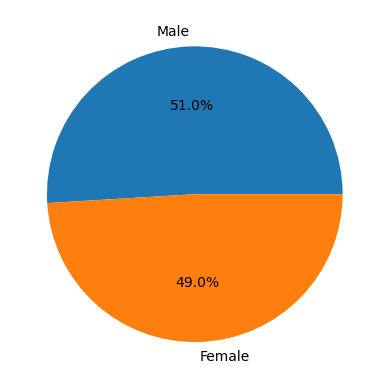

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sex, labels=mouse_sex.index, autopct="%1.1f%%")

plt.show()

## Quartiles, Outliers and Boxplots

In [112]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = no_dups.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_tumor = pd.merge(max_timepoint, no_dups, how="inner", on=["Timepoint", "Mouse ID"])


Capomulin's potential outliers: [23.34359787, 28.43096411, 28.48403281, 30.48598484, 31.02392294, 31.8962384, 32.37735684, 33.32909778, 46.53920617, 47.68596303]
Ramicane's potential outliers: [22.05012627]
Infubinol's potential outliers: [36.3213458, 45.69933088, 46.25011212, 47.01036401]
Ceftamin's potential outliers: [45.0, 45.0, 45.0, 45.0, 46.78453491, 47.7846818, 48.72207785]


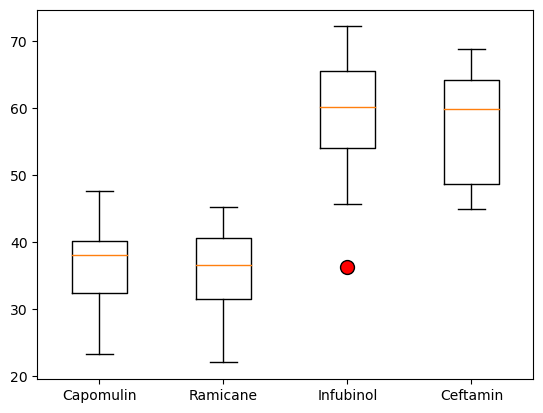

In [111]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

ls = []

for drug in drugs:
    ls = max_tumor.loc[max_tumor["Drug Regimen"] == drug, "Tumor Volume (mm3)"].to_list()
    ls.sort()
    tumor_vol.append(ls)
    
    ser = pd.Series(ls)
    quartiles = ser.quantile([.25,.5,.75])    
    lowerq = quartiles[0.5]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq    
    lower_bound = lowerq - (2*iqr)
    upper_bound = upperq + (2*iqr)
    
    outlier = []
    for val in ser:
        if val < lower_bound or val > upper_bound:
            outlier.append(val)
    
    print(f"{drug}'s potential outliers: {outlier}")

    
    
plt.boxplot(tumor_vol, labels=drugs, flierprops={"markerfacecolor":"red", "markersize":10})
plt.show()


## Line and Scatter Plots

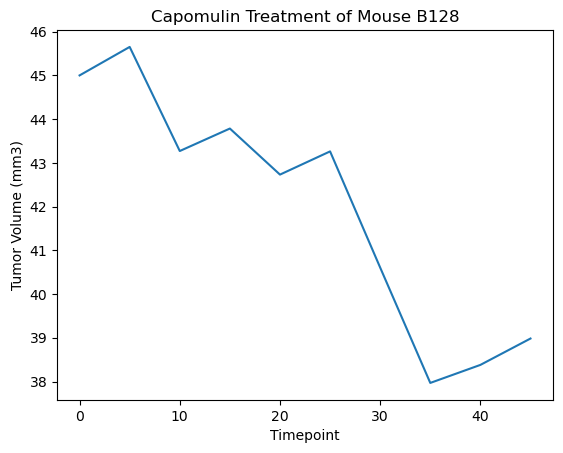

In [152]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
one_mouse = no_dups.loc[no_dups["Mouse ID"] == "b128", ["Tumor Volume (mm3)", "Timepoint"]]
#type(one_mouse)
one_mouse.plot(kind="line", 
               x="Timepoint", 
               y="Tumor Volume (mm3)", 
               ylabel="Tumor Volume (mm3)", 
               title="Capomulin Treatment of Mouse B128", 
               legend=False)
plt.show()

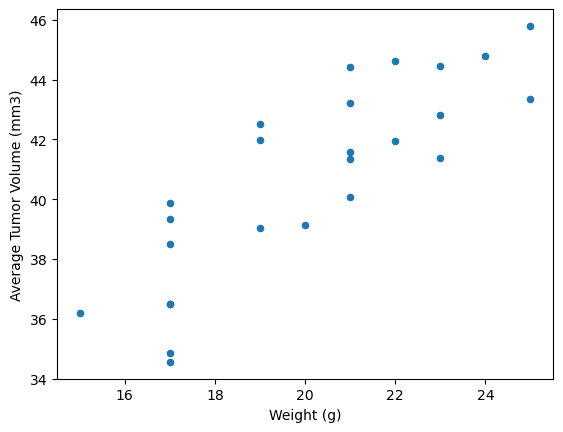

In [175]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin = no_dups.loc[no_dups["Drug Regimen"] == "Capomulin", ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin = capomulin.groupby("Mouse ID").mean()
capomulin

capomulin.plot(kind="scatter", 
               x="Weight (g)", 
               y="Tumor Volume (mm3)", 
               ylabel="Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


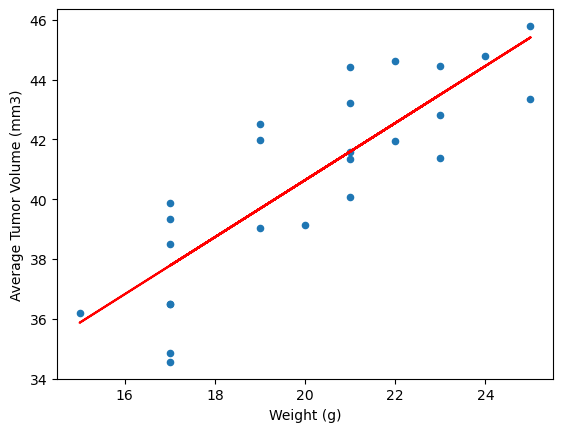

In [199]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin["Weight (g)"], capomulin["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

slope, inter, r, p, std = st.linregress(capomulin["Weight (g)"], capomulin["Tumor Volume (mm3)"])

fit = slope * capomulin["Weight (g)"] + inter

capomulin.plot(kind="scatter", 
               x="Weight (g)", 
               y="Tumor Volume (mm3)", 
               ylabel="Average Tumor Volume (mm3)")

plt.plot(capomulin["Weight (g)"], fit, color="red")
plt.show()